## Homework 4

In [13]:
from  modules.LinearRegression import LinearRegression
from modules.RidgeRegression import RidgeRegression
import numpy as np 
import matplotlib.pyplot as plt
# load datasets and libraries to data split
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

R^2: 0.9374151607623286
Mean Squared Error: 0.061643179637121445
R^2 Ridge: 0.9211342
Mean Squared Error Ridge: 0.07767919


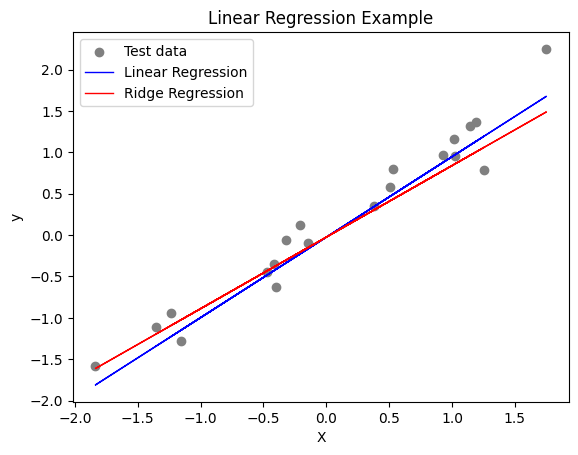

In [16]:

# Generate some random regression data
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
# Create a StandardScaler instance
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Fit the scaler to the data and transform the data
X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y.reshape(-1, 1))

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and train the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lin_reg.predict(X_test)

# Calculate R^2 and Mean Squared Error
r = lin_reg.score(X_test,y_test) 
print("R^2:", r)

mse = lin_reg.mean_squared_error(X_test,y_test) 
print("Mean Squared Error:", mse)


ridge_regression = RidgeRegression(lambda_=10)
ridge_regression.fit(X_train, y_train)
y_pred_ridge = ridge_regression.predict(X_test)

# Calculate R^2 and Mean Squared Error
r_ridge = ridge_regression.score(X_test,y_test)
print("R^2 Ridge:", r_ridge)

mse_ridge = ridge_regression.mean_squared_error(X_test,y_test)
print("Mean Squared Error Ridge:", mse_ridge)

# Plot the results
plt.scatter(X_test, y_test, color='gray', label='Test data')
plt.plot(X_test, y_pred, color='blue', linewidth=1, label='Linear Regression')
plt.plot(X_test, y_pred_ridge, color='red', linewidth=1, label='Ridge Regression')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Example')
plt.show()